Kate Anderson
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [52]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [53]:
# separate into features and target
y = mushrooms_df['type']
x = mushrooms_df.drop(columns=['type'])

print(x.shape)

(8124, 22)


In [54]:
# transforming data into numerical data
# ordinal features
ordinal_feat = ['bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'veil_type', 'ring_number', 'population']
feat_order = [['f', 't'], ['f', 'a'], ['c', 'w'], ['n', 'b'], ['t', 'e'], ['p'], ['n', 'o', 't'], ['y', 's', 'v', 'n', 'c', 'a']]
ordEnc = OrdinalEncoder(categories = feat_order)

# categorical features
cat_feat = ['cap_shape', 'cap_surface', 'cap_color', 'odor', 'gill_color', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_type', 'spore_print_color', 'habitat']
catEnc = OneHotEncoder()

# transform feature data
feat_trans = ColumnTransformer(transformers=
                               [('ord', ordEnc, ordinal_feat),
                                ('cat', catEnc, cat_feat)],
                               remainder='passthrough',
                               verbose_feature_names_out=False)

x_trans = feat_trans.fit_transform(x)

# transform target data - poisonous will be 1, edible will be 0
labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(y)

y_trans

array([1, 0, 0, ..., 0, 1, 0])

In [55]:
# extract new feature names for making dataframe
new_feat_names = feat_trans.get_feature_names_out()
#new_feat_names

# ensure that x_trans is an array so that I can create a dataframe
x_trans = x_trans.toarray()

# confirm that the number of columns is the same as the number of feature names
print(x_trans.shape) 
print(len(new_feat_names)) 

(8124, 105)
105


In [56]:
# create a dataframe with the transformed data
mushrooms_df2= pd.DataFrame(x_trans, columns = new_feat_names)
mushrooms_df2

,bruises,gill_attachment,gill_spacing,gill_size,stalk_shape,veil_type,ring_number,population,cap_shape_b,cap_shape_c,...,spore_print_color_u,spore_print_color_w,spore_print_color_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size=0.2, random_state=59)

# Scale the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [64]:
# Train a logistic regression model
model_LogReg = LogisticRegression(solver = 'saga', penalty = None)

# define hyperparameter options
param_lg = {'max_iter': [100, 1000, 5000, 10000]}

# Apply GridSearchCV
grd_srch_lg = GridSearchCV(model_LogReg, param_lg, cv=5, scoring='accuracy')
grd_srch_lg.fit(X_train_scaled, y_train)

# Get the best model and hyperparameters
best_logreg_model = grd_srch_lg.best_estimator_
best_logreg_params = grd_srch_lg.best_params_

# Make predictions using the best model
y_pred_log = best_logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')

print("Best Hyperparameters for Logistic Regression: ", best_logreg_params)
print("Accuracy for Logistic Regression: ", accuracy_log)
print("Precision for Logistic Regression: ", precision_log)
print("Recall for Logistic Regression: ", recall_log)

model_LogReg.fit(X_train_scaled, y_train)

# Make predictions for logistic regression
y_pred_log = model_LogReg.predict(X_test_scaled)

Best Hyperparameters for Logistic Regression:  {'max_iter': 1000}
Accuracy for Logistic Regression:  1.0
Precision for Logistic Regression:  1.0
Recall for Logistic Regression:  1.0


In [ ]:
# train decision tree model
model_dt = DecisionTreeClassifier()

# assign parameters
params = {'max_depth':[2, 4, 6, 8],
               'min_samples_split': [5, 10, 20]}

# apply grid search to find best hyperparameters
model_dt_grid = GridSearchCV(model_dt,
                   param_grid = params, # hyperparameters
                   cv = 5)

# fit the model
model_dt_grid.fit(X_train_scaled, y_train)

# save the best estimator and parameters
best_dt_model = model_dt_grid.best_estimator_
best_dt_params = model_dt_grid.best_params_

# make predictions for decision tree
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Calculate accuracy, precision, and recall
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')  # Use 'weighted' for multiclass
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

print("Best Hyperparameters for Decision Tree: ", best_dt_params)
print("Accuracy for Decision Tree: ", accuracy_dt)
print("Precision for Decision Tree: ", precision_dt)
print("Recall for Decision Tree: ", recall_dt)

Best Hyperparameters for Decision Tree:  {'max_depth': 6, 'min_samples_split': 5}
Accuracy for Decision Tree:  1.0
Precision for Decision Tree:  1.0
Recall for Decision Tree:  1.0


In [33]:
# train random forest model
model_rf = RandomForestClassifier(n_estimators = 100, max_depth = 10)


# assign parameters
params_rf = {'n_estimators': [5, 10, 25, 50],
             'max_depth':[2, 4, 6, 8],
               'min_samples_split': [5, 10, 20]}

# apply grid search to find best hyperparameters
model_rf_grid = GridSearchCV(model_rf,
                   param_grid = params_rf, # hyperparameters
                   cv = 5)

# fit the model
model_rf_grid.fit(X_train_scaled, y_train)

# save the best estimator and parameters
best_rf_model = model_rf_grid.best_estimator_
best_rf_params = model_rf_grid.best_params_

# make predictions for random forest
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculate accuracy, precision, and recall
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multiclass
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print("Best Hyperparameters for Random Forest: ", best_rf_params)
print("Accuracy for Random Forest: ", accuracy_rf)
print("Precision for Random Forest: ", precision_rf)
print("Recall for Random Forest: ", recall_rf)

Best Hyperparameters for Random Forest:  {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 25}
Accuracy for Random Forest:  1.0
Precision for Random Forest:  1.0
Recall for Random Forest:  1.0


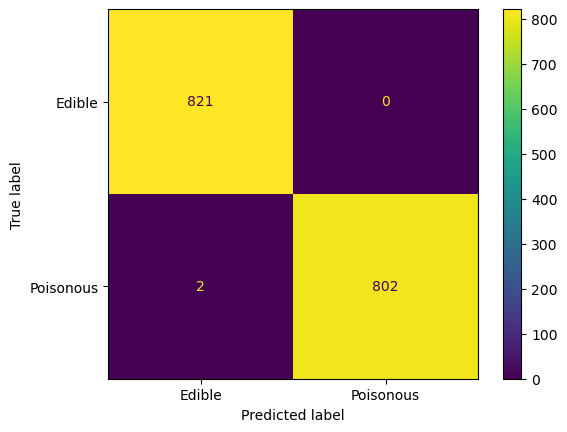

In [65]:
# make confusion matrix for the logistic regression prediction results
cfm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cfm, display_labels = ['Edible', 'Poisonous']).plot()

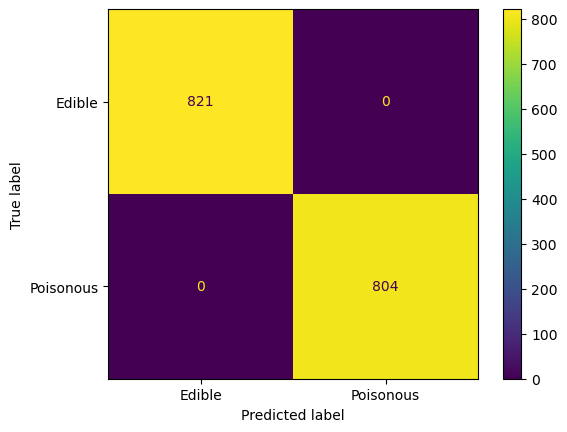

In [30]:
# make confusion matrix for the decision tree prediction results
cfm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cfm_dt, display_labels = ['Edible', 'Poisonous']).plot()

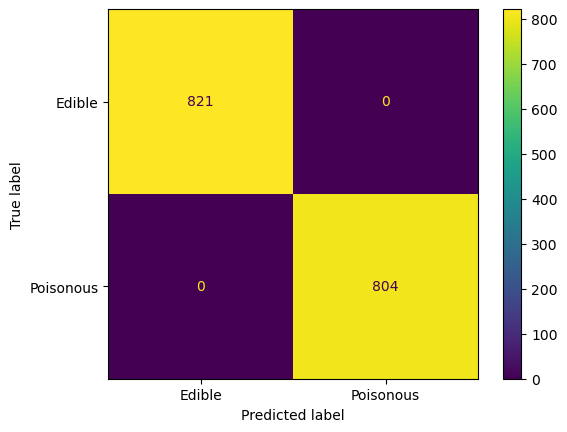

In [34]:
# make confusion matrix for the random forest prediction results
cfm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cfm_rf, display_labels = ['Edible', 'Poisonous']).plot()

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: Any of the models yielded 100% accuracy
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [35]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
nfl_draft.head()

,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


In [36]:
# turn the round column into a day column where day 1 is round 1, day 2 is round 2 and 3, day 3 is round 4,5,6,7
# create an array for days
days = np.array([])

# create an array for rounds
round_array = np.array(nfl_draft['round'])
round_array

# assign days based on round number
for round in round_array:
    if round == 1:
        days = np.append(days, 1)
    elif round == 2 or round == 3:
        days = np.append(days, 2)
    else:
        days = np.append(days, 3)
       
# add the days array as a column to the dataframe and drop round
nfl_draft['day'] = days
nfl_draft.head()


,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle,day
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN,1.0
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83,1.0
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN,1.0
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04,1.0
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN,1.0


In [37]:
# dropping round and name columns and bunch of columns that have a lot of NaN values
nfl_draft.drop(columns = ['Unnamed: 0', 'round', 'name', 'college_conference', 'vertical', 'broad_jump', 'cone', 'shuttle'], inplace = True)

# filter out the rest of the rows that include NaN values
nfl_draft = nfl_draft.dropna()

In [38]:
# assign the target and features
y = nfl_draft['day']
x = nfl_draft.drop(columns = ['day'])

# encode the position column, categorical data
posEnc = OneHotEncoder()

# transform feature data
pos_trans = ColumnTransformer(transformers=
                               [('pos', posEnc, ['position'])],
                               remainder='passthrough',
                               verbose_feature_names_out=False)

x_trans_nfl = pos_trans.fit_transform(x)

In [39]:
# get new feature names out
new_feat_name = pos_trans.get_feature_names_out()
new_feat_name

array(['position_DB', 'position_DL', 'position_LB', 'season', 'age',
       'height', 'weight', 'forty'], dtype=object)

In [40]:
# create a dataframe with the transformed data
nfl_draft2= pd.DataFrame(x_trans_nfl, columns = new_feat_name)
nfl_draft2

,position_DB,position_DL,position_LB,season,age,height,weight,forty
0,0.0,1.0,0.0,2003.0,21.0,6.083333,317.0,5.15
1,1.0,0.0,0.0,2003.0,25.0,5.833333,189.0,4.37
2,0.0,1.0,0.0,2003.0,22.0,6.250000,313.0,5.10
3,0.0,1.0,0.0,2003.0,23.0,6.416667,304.0,4.81
4,0.0,0.0,1.0,2003.0,20.0,6.250000,262.0,4.84
...,...,...,...,...,...,...,...,...
2088,0.0,0.0,1.0,2024.0,24.0,6.500000,278.0,4.67
2089,1.0,0.0,0.0,2024.0,21.0,6.333333,231.0,4.65
2090,0.0,1.0,0.0,2024.0,23.0,6.166667,286.0,5.06
2091,1.0,0.0,0.0,2024.0,21.0,5.916667,191.0,4.61


In [41]:
# Split the dataset into training and testing sets
X_train_nfl, X_test_nfl, y_train_nfl, y_test_nfl = train_test_split(x_trans_nfl, y, test_size=0.2, random_state=42)

# Scale the data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_nfl)
X_test_sc = ss.fit_transform(X_test_nfl)

Below is my chosen model!!

In [50]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning)

# Train a logistic regression model
model_LogReg = LogisticRegression(solver = 'saga')

# define hyperparameter options
param_log = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 
    'l1_ratio': [0.1, 0.5, 0.9],
    'C': [0.1, 1, 10, 100],  
    'max_iter': [100, 1000, 10000]}

# Apply GridSearchCV
grd_srch_log = GridSearchCV(model_LogReg, param_log, cv=5, scoring='accuracy')
grd_srch_log.fit(X_train_sc, y_train_nfl)

# Get the best model and hyperparameters
best_logreg_model = grd_srch_log.best_estimator_
best_logreg_params = grd_srch_log.best_params_

# Make predictions using the best model
y_pred_lg = best_logreg_model.predict(X_test_sc)

# Evaluate the model
accuracy_lg = accuracy_score(y_test_nfl, y_pred_lg)
precision_lg = precision_score(y_test_nfl, y_pred_lg, average='weighted')
recall_lg = recall_score(y_test_nfl, y_pred_lg, average='weighted')

print("Best Hyperparameters for Logistic Regression: ", best_logreg_params)
print("Accuracy for Logistic Regression: ", accuracy_lg)
print("Precision for Logistic Regression: ", precision_lg)
print("Recall for Logistic Regression: ", recall_lg)

Best Hyperparameters for Logistic Regression:  {'C': 0.1, 'l1_ratio': 0.9, 'max_iter': 100, 'penalty': 'elasticnet'}
Accuracy for Logistic Regression:  0.5441527446300716
Precision for Logistic Regression:  0.4778617369847499
Recall for Logistic Regression:  0.5441527446300716


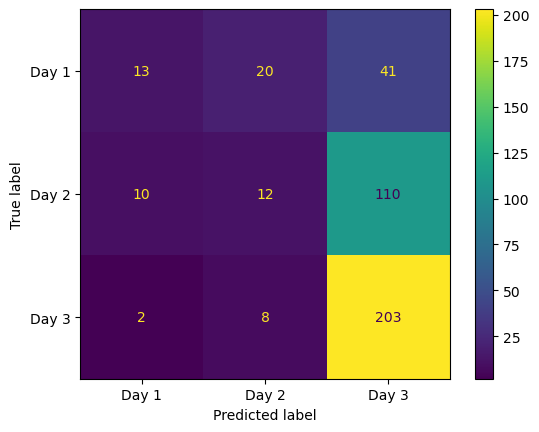

In [51]:
# make confusion matrix for the logistic regression prediction results
cfm = confusion_matrix(y_test_nfl, y_pred_lg)
ConfusionMatrixDisplay(cfm, display_labels = ['Day 1', 'Day 2', 'Day 3']).plot()

Less optimal models used for comparison

In [69]:
# train decision tree model
model_det = DecisionTreeClassifier()

# assign parameters
param = {'max_depth':[2, 4, 6, 8, 10],
               'min_samples_split': [5, 10, 20],
               'min_samples_leaf': [1, 2, 5, 10]}

# apply grid search to find best hyperparameters
model_det_grid = GridSearchCV(model_det,
                   param_grid = param, # hyperparameters
                   cv = 5)

# fit the model
model_det_grid.fit(X_train_sc, y_train_nfl)

# save the best estimator and parameters
best_det_model = model_det_grid.best_estimator_
best_det_params = model_det_grid.best_params_

# make predictions for decision tree
y_pred_det = best_det_model.predict(X_test_sc)

# Calculate accuracy, precision, and recall
accuracy_det = accuracy_score(y_test_nfl, y_pred_det)
precision_det = precision_score(y_test_nfl, y_pred_det, average='weighted')  # Use 'weighted' for multiclass
recall_det = recall_score(y_test_nfl, y_pred_det, average='weighted')

print("Best Hyperparameters for Decision Tree: ", best_det_params)
print("Accuracy for Decision Tree: ", accuracy_det)
print("Precision for Decision Tree: ", precision_det)
print("Recall for Decision Tree: ", recall_det)

Best Hyperparameters for Decision Tree:  {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 5}
Accuracy for Decision Tree:  0.513126491646778
Precision for Decision Tree:  0.4823373008179601
Recall for Decision Tree:  0.513126491646778


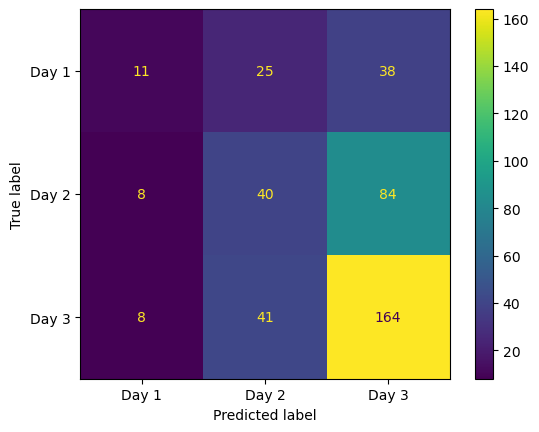

In [70]:
# make confusion matrix for the decision tree prediction results
cfm = confusion_matrix(y_test_nfl, y_pred_det)
ConfusionMatrixDisplay(cfm, display_labels = ['Day 1', 'Day 2', 'Day 3']).plot()

In [71]:
# train random forest model
model_raf = RandomForestClassifier()

# assign parameters
params_raf = {'n_estimators': [5, 10, 25, 50, 100],
             'max_depth':[2, 4, 6, 8, 10],
               'min_samples_split': [5, 10, 20],
               'min_samples_leaf': [1, 2, 5, 10]}

# apply grid search to find best hyperparameters
model_raf_grid = GridSearchCV(model_raf,
                   param_grid = params_raf, # hyperparameters
                   cv = 5)

# fit the model
model_raf_grid.fit(X_train_sc, y_train_nfl)

# save the best estimator and parameters
best_raf_model = model_raf_grid.best_estimator_
best_raf_params = model_raf_grid.best_params_

# make predictions for random forest
y_pred_raf = best_raf_model.predict(X_test_sc)

# Calculate accuracy, precision, and recall
accuracy_raf = accuracy_score(y_test_nfl, y_pred_raf)
precision_raf = precision_score(y_test_nfl, y_pred_raf, average='weighted')  # Use 'weighted' for multiclass
recall_raf = recall_score(y_test_nfl, y_pred_raf, average='weighted')

print("Best Hyperparameters for Random Forest: ", best_raf_params)
print("Accuracy for Random Forest: ", accuracy_raf)
print("Precision for Random Forest: ", precision_raf)
print("Recall for Random Forest: ", recall_raf)

Best Hyperparameters for Random Forest:  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy for Random Forest:  0.5369928400954654
Precision for Random Forest:  0.4960059416062322
Recall for Random Forest:  0.5369928400954654


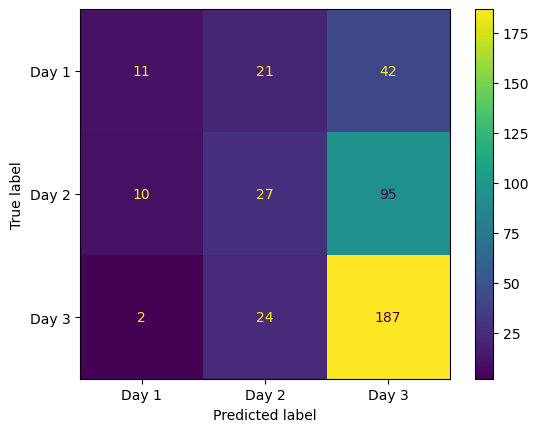

In [72]:
# make confusion matrix for the decision tree prediction results
cfm = confusion_matrix(y_test_nfl, y_pred_raf)
ConfusionMatrixDisplay(cfm, display_labels = ['Day 1', 'Day 2', 'Day 3']).plot()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
    - I chose Logistic Regression because it had the highest accuracy when I ran it with the optimized hyperparameters from GridSearchCV
 - What was your accuracy?
    - My accuracy was 0.544